<a href="https://colab.research.google.com/github/punitiisc/fellowship/blob/main/Creating_Image_Folders_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import all the necessary packages and libraries here.

In [ ]:
import os
import glob
import tarfile
import numpy as np
import shutil
from scipy.io import loadmat
from shutil import copyfile, rmtree
import sys

This program can be used to create a folder of classified images . The main folder will have three sub folders, Test, Train and Valid. Within each of these folders, there will be folders of different classes. Within each class folder will reside the individual files

There is a file setid.mat within the folder that cantains the file ids that must go into each of the folders . We first load this file into a dictioany that has the folder name as the key and the file ids are the numbers stored in array format

In [ ]:
from scipy.io import loadmat
setid = loadmat('/content/drive/MyDrive/fellowship/setid.mat')

In [ ]:
setid.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009'), ('__version__', '1.0'), ('__globals__', []), ('trnid', array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16)), ('valid', array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16)), ('tstid', array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16))])

Extract all the valus into seperate arrays . Subtract 1 as Matlab indexing starts with 1 and not 0 as in python.

In [ ]:
idx_train = setid['trnid'][0] - 1
idx_test = setid['tstid'][0] - 1
idx_valid = setid['valid'][0] - 1

View the contents of the first array

In [ ]:
idx_train

array([6764, 6754, 6767, ..., 8025, 8035, 8040], dtype=uint16)

Now store the labels of each of the images in a seperate array

In [ ]:
image_labels = loadmat('/content/drive/MyDrive/fellowship/imagelabels.mat')['labels'][0]

Again we need to subtract 1 from the labels

In [ ]:
image_labels -= 1

Sepecify the archive path in your drive

In [ ]:
segflowers_archive_path = os.path.join('/content/drive/MyDrive/fellowship', '102segmentations.tgz')

The tarfile object has all the files extracted to the data path

In [ ]:
data_path ='/content/drive/MyDrive/fellowship/jpg'
tarfile.open(segflowers_archive_path).extractall(path=data_path)

The global module or glob searches for all the jpg files in the specified path

In [ ]:
files = sorted(glob.glob(os.path.join(data_path, 'segmim', '*.jpg')))
labels = np.array([i for i in zip(files, image_labels)])

In [ ]:
data_dir ='/content/drive/MyDrive/fellowship/segflower'
def move_files(dir_name, labels):
    cur_dir_path = os.path.join(data_dir, dir_name)
    if not os.path.exists(cur_dir_path):
        os.mkdir(cur_dir_path)

    for i in range(0, 102):
        class_dir = os.path.join(data_dir, dir_name, str(i))
        os.mkdir(class_dir)

    for label in labels:
        src = str(label[0])
        dst = os.path.join(cwd, dir_name, label[1], src.split(os.sep)[-1])
        copyfile(src, dst)


move_files('train', labels[idx_test, :])
move_files('test', labels[idx_train, :])
move_files('valid', labels[idx_valid, :])

The floder structure would look like this in the first level

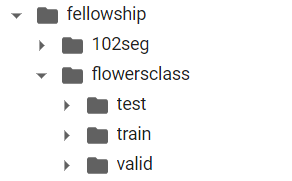

Expanding the folders one more level should get a view similar to this

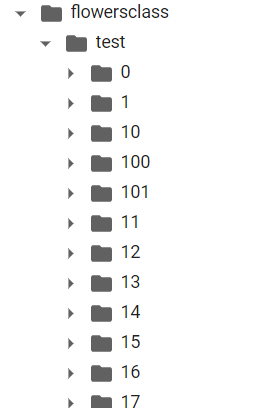

In case you need to delete a folder and its contents the following command can be used

In [ ]:
shutil.rmtree('/content/drive/MyDrive/fellowship/segflower')